# Visualize BLEU Scores


In [2]:
!ls tabs

BLEU-step124k_beam4_lp0.6_ens10.txt
dataset-selection.min.tsv
dataset-selection.tsv
train.good.dedup.notest.ascitgt.tok.stats.tsv


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
path = 'tabs/BLEU-step124k_beam4_lp0.6_ens10.txt'
tab = pd.read_table(path)
tab

,Test Name,Language,BLEU
0,OPUS100v1,MLT,59.6
1,OPUS100v1,GLA,58.8
2,OPUS100v1,GLE,57.9
3,UNv1,ARA,55.8
4,UNv1,SPA,54.5
...,...,...,...
177,wikipedia_devtest_kmen,KHM,7.4
178,Indian-6,TEL,6.7
179,OPUS100v1,SME,6.4
180,wikipedia_devtest_psen,PUS,5.4


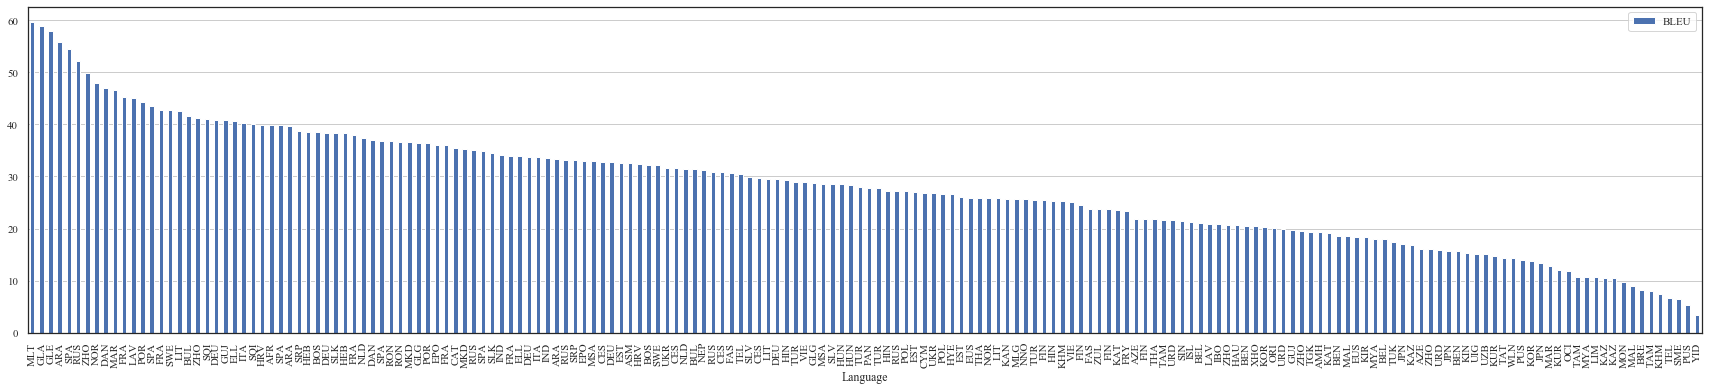

In [3]:
sns.set(font="Times New Roman", style='white',font_scale=.99)

ax = tab[['Language', 'BLEU']].plot.bar(figsize=(30, 6), x='Language', y='BLEU', )
ax.grid(axis='y')

#pd.DataFrame.plot(data=tab, x='Language', y='BLEU')

In [5]:
tab_sorted = tab.sort_values(by='BLEU', ascending=False)
tab_sorted

,Test Name,Language,BLEU
0,OPUS100v1,MLT,59.6
1,OPUS100v1,GLA,58.8
2,OPUS100v1,GLE,57.9
3,UNv1,ARA,55.8
4,UNv1,SPA,54.5
...,...,...,...
177,wikipedia_devtest_kmen,KHM,7.4
178,Indian-6,TEL,6.7
179,OPUS100v1,SME,6.4
180,wikipedia_devtest_psen,PUS,5.4


In [6]:
tab_uniq = tab_sorted.drop_duplicates(['Language'], keep='first')  # one test per language
tab_uniq

,Test Name,Language,BLEU
0,OPUS100v1,MLT,59.6
1,OPUS100v1,GLA,58.8
2,OPUS100v1,GLE,57.9
3,UNv1,ARA,55.8
4,UNv1,SPA,54.5
...,...,...,...
170,OPUS100v1,LIM,10.7
173,NTTalksv1,MON,9.7
175,OPUS100v1,BRE,8.3
179,OPUS100v1,SME,6.4


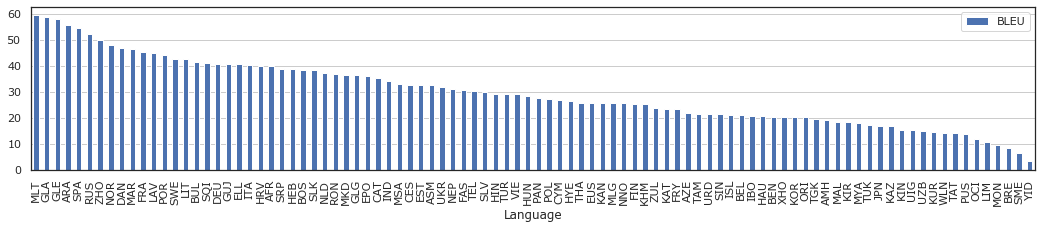

In [7]:
sns.set(font="Verdana", style='white',font_scale=1)
ax = tab_uniq[['Language', 'BLEU']].plot.bar(figsize=(18, 3), x='Language', y='BLEU')
ax.grid(axis='y')

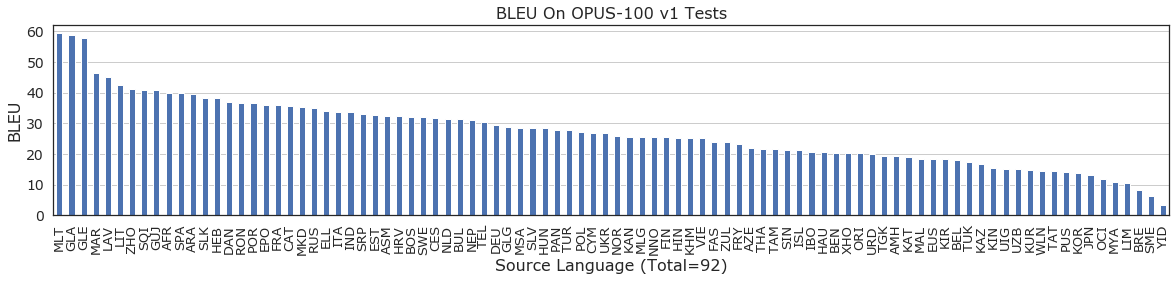

In [45]:
sns.set(font="Verdana", style='white',font_scale=1)
tab_opus = tab[tab['Test Name'] == 'OPUS100v1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_opus)})', ylabel='BLEU', title=f'BLEU On OPUS-100 v1 Tests', figsize=(20, 3.5), legend=False)
ax = tab_opus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y', markevery=10)
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)

plt.savefig('charts/BLEU-opus100.pdf', bbox_inches='tight')

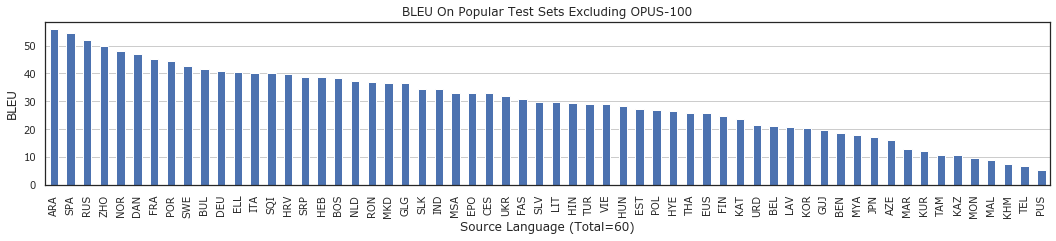

In [47]:

tab_nonopus = tab[tab['Test Name'] != 'OPUS100v1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_nonopus)})', ylabel='BLEU', figsize=(18, 3), fontsize=10, legend=False)
ax = tab_nonopus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', title=f'BLEU On Popular Test Sets Excluding OPUS-100', **viz_args)
ax.grid(axis='y')
plt.savefig('charts/BLEU-non-opus100.pdf', bbox_inches='tight')

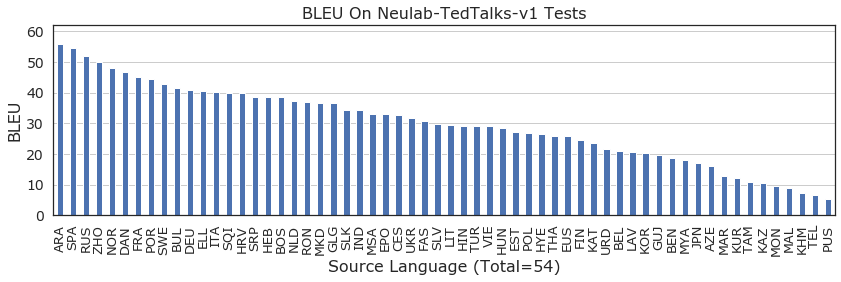

In [52]:

tab_nttalks = tab[tab['Test Name'] == 'NTTalksv1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_nttalks)})', ylabel='BLEU', figsize=(14, 3.5), fontsize=16, legend=False, title=f'BLEU On Neulab-TedTalks-v1 Tests')
ax = tab_nonopus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y')
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.savefig('charts/BLEU-nttalksv1.pdf', bbox_inches='tight')

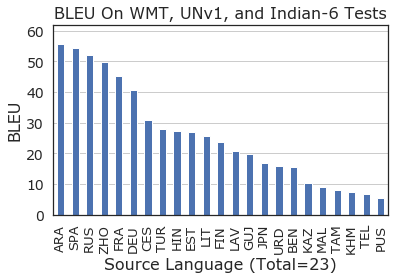

In [54]:
tab_rest= tab[(tab['Test Name'] != 'NTTalksv1') & (tab['Test Name'] != 'OPUS100v1') ].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language (Total={len(tab_rest)})', ylabel='BLEU', figsize=(6, 3.5), legend=False, title=f'BLEU On WMT, UNv1, and Indian-6 Tests')
ax = tab_rest[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y')
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.savefig('charts/BLEU-wmt-etc.pdf', bbox_inches='tight')

In [108]:
tab_rest

,Test Name,Language,BLEU
3,UNv1,ARA,55.8
4,UNv1,SPA,54.5
5,UNv1,RUS,52.1
6,UNv1,ZHO,49.9
10,UNv1,FRA,45.2
20,newstest2018_deen,DEU,40.8
75,newstest2019_encs,CES,30.8
90,newstest2018_tren,TUR,27.9
93,IIT Bombay,HIN,27.3
96,newstest2018_eten,EST,27.1


In [13]:
help(ax.grid)

Help on method grid in module matplotlib.axes._base:

grid(b=None, which='major', axis='both', **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Configure the grid lines.
    
    Parameters
    ----------
    b : bool or None, optional
        Whether to show the grid lines. If any *kwargs* are supplied,
        it is assumed you want the grid on and *b* will be set to True.
    
        If *b* is *None* and there are no *kwargs*, this toggles the
        visibility of the lines.
    
    which : {'major', 'minor', 'both'}, optional
        The grid lines to apply the changes on.
    
    axis : {'both', 'x', 'y'}, optional
        The axis to apply the changes on.
    
    **kwargs : `.Line2D` properties
        Define the line properties of the grid, e.g.::
    
            grid(color='r', linestyle='-', linewidth=2)
    
        Valid *kwargs* are
    
      agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n,